# Task 2: Data analysis

In [192]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
from sklearn.linear_model import LinearRegression
import datetime as dt
import numpy as np
from scipy.stats import pearsonr
from sklearn.cluster import KMeans
#sns.set()

In [193]:
processed = pd.read_excel('./input_data/processed_data.xlsx', sheet_name='processed',engine='openpyxl')

In [194]:
print(processed.info())
processed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   day               40 non-null     datetime64[ns]
 1   worldwide_events  40 non-null     float64       
 2   USA_events        40 non-null     float64       
 3   UK_events         40 non-null     float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.4 KB
None


,day,worldwide_events,USA_events,UK_events
0,2021-02-20,2.395522e+06,0.000000e+00,0.000000e+00
1,2021-02-28,0.000000e+00,3.330581e+06,0.000000e+00
2,2021-03-30,0.000000e+00,2.515767e+06,0.000000e+00
3,2021-03-31,5.144722e+06,0.000000e+00,5.144722e+06
4,2021-04-01,7.429008e+06,3.765660e+06,7.429008e+06
5,2021-04-05,3.391571e+06,2.386534e+06,3.391571e+06
6,2021-04-07,0.000000e+00,3.406821e+06,0.000000e+00
7,2021-05-22,0.000000e+00,2.310263e+06,0.000000e+00
8,2021-05-26,2.733044e+06,4.445519e+06,0.000000e+00
9,2021-05-27,0.000000e+00,0.000000e+00,2.168840e+06


In [195]:
processed.corr(method='pearson')

,worldwide_events,USA_events,UK_events
worldwide_events,1.000000,0.218179,0.692099
USA_events,0.218179,1.000000,-0.188845
UK_events,0.692099,-0.188845,1.000000


In [196]:
def pearsonr_pval(x,y):
        return pearsonr(x,y)[1]

In [197]:
processed.corr(method=pearsonr_pval)

,worldwide_events,USA_events,UK_events
worldwide_events,1.000000e+00,0.176219,7.547333e-07
USA_events,1.762186e-01,1.000000,2.432009e-01
UK_events,7.547333e-07,0.243201,1.000000e+00


In [199]:
processed

,day,worldwide_events,USA_events,UK_events
0,2021-02-20,2.395522e+06,0.000000e+00,0.000000e+00
1,2021-02-28,0.000000e+00,3.330581e+06,0.000000e+00
2,2021-03-30,0.000000e+00,2.515767e+06,0.000000e+00
3,2021-03-31,5.144722e+06,0.000000e+00,5.144722e+06
4,2021-04-01,7.429008e+06,3.765660e+06,7.429008e+06
5,2021-04-05,3.391571e+06,2.386534e+06,3.391571e+06
6,2021-04-07,0.000000e+00,3.406821e+06,0.000000e+00
7,2021-05-22,0.000000e+00,2.310263e+06,0.000000e+00
8,2021-05-26,2.733044e+06,4.445519e+06,0.000000e+00
9,2021-05-27,0.000000e+00,0.000000e+00,2.168840e+06


<AxesSubplot:xlabel='day', ylabel='value'>

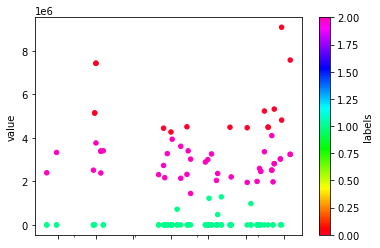

In [229]:
data_clustering=pd.melt(processed, id_vars=['day'], value_vars=['worldwide_events','USA_events','UK_events'])
data_clustering['day_ordinal']=data_clustering['day'].map(dt.datetime.toordinal)

km = KMeans(n_clusters=3)
km.fit(data_clustering[['day_ordinal','value']])

data_clustering['labels']=km.labels_
data_clustering

data_clustering.plot.scatter('day', 'value', c='labels', colormap='gist_rainbow')

In [230]:
mainstream_media = pd.read_excel('./input_data/mainstream_media.xlsx', sheet_name='data',engine='openpyxl')

In [231]:
mainstream_media

,day,events
0,2021-01-21,Joe Biden Inauguration day
1,2021-02-19,US rejoins Paris climate change accords
2,2021-03-24,MM Ever Given cargo ship blocks the Suez Canal
3,2021-04-21,Derek Chauvin convicted of the murder of Georg...
4,2021-05-03,SpaceX crew arrive home with rare pre-dawn spl...
5,2021-06-24,Colapse of a 12-storey condo building in Florida
6,2021-07-23,Tokyo Olympics opening games ceremony
7,2021-08-02,test
8,2021-08-06,Fall of Afghanistan
9,2021-09-03,Texas bans abortions after 6 weeks


In [232]:
processed.set_index('day',inplace=True)

In [233]:
processed[processed > 0.]=1.

In [234]:
processed

,worldwide_events,USA_events,UK_events,labels
day,,,,
2021-02-20,1.0,0.0,0.0,1
2021-02-28,0.0,1.0,0.0,0
2021-03-30,0.0,1.0,0.0,0
2021-03-31,1.0,0.0,1.0,1
2021-04-01,1.0,1.0,1.0,1
2021-04-05,1.0,1.0,1.0,1
2021-04-07,0.0,1.0,0.0,0
2021-05-22,0.0,1.0,0.0,0
2021-05-26,1.0,1.0,0.0,1


In [235]:
mainstream_media.set_index('day',inplace=True)

In [236]:
media_2021=processed.join(mainstream_media,how="outer",sort=True)

In [237]:
media_2021.fillna(0,inplace=True)

In [238]:
media_2021.style.background_gradient(cmap='Blues')

,worldwide_events,USA_events,UK_events,labels,events
day,,,,,
2021-01-21 00:00:00,0.000000,0.000000,0.000000,0.000000,Joe Biden Inauguration day
2021-02-19 00:00:00,0.000000,0.000000,0.000000,0.000000,US rejoins Paris climate change accords
2021-02-20 00:00:00,1.000000,0.000000,0.000000,1.000000,0
2021-02-28 00:00:00,0.000000,1.000000,0.000000,0.000000,0
2021-03-24 00:00:00,0.000000,0.000000,0.000000,0.000000,MM Ever Given cargo ship blocks the Suez Canal
2021-03-30 00:00:00,0.000000,1.000000,0.000000,0.000000,0
2021-03-31 00:00:00,1.000000,0.000000,1.000000,1.000000,0
2021-04-01 00:00:00,1.000000,1.000000,1.000000,1.000000,0
2021-04-05 00:00:00,1.000000,1.000000,1.000000,1.000000,0


In [239]:
media_2021['media_num'] = media_2021['events'].apply(lambda x: x if x == 0 else 1)

#convert_objects(convert_numeric=True).fillna(1)

In [240]:
media_2021

,worldwide_events,USA_events,UK_events,labels,events,media_num
day,,,,,,
2021-01-21,0.0,0.0,0.0,0.0,Joe Biden Inauguration day,1
2021-02-19,0.0,0.0,0.0,0.0,US rejoins Paris climate change accords,1
2021-02-20,1.0,0.0,0.0,1.0,0,0
2021-02-28,0.0,1.0,0.0,0.0,0,0
2021-03-24,0.0,0.0,0.0,0.0,MM Ever Given cargo ship blocks the Suez Canal,1
2021-03-30,0.0,1.0,0.0,0.0,0,0
2021-03-31,1.0,0.0,1.0,1.0,0,0
2021-04-01,1.0,1.0,1.0,1.0,0,0
2021-04-05,1.0,1.0,1.0,1.0,0,0


In [241]:
media_2021.corr(method='pearson')

,worldwide_events,USA_events,UK_events,labels,media_num
worldwide_events,1.000000,0.127108,0.322190,0.737468,-0.350438
USA_events,0.127108,1.000000,-0.140286,-0.181429,-0.534522
UK_events,0.322190,-0.140286,1.000000,0.638288,-0.365148
labels,0.737468,-0.181429,0.638288,1.000000,-0.475191
media_num,-0.350438,-0.534522,-0.365148,-0.475191,1.000000


In [242]:
media_2021.corr(method=pearsonr_pval)

,worldwide_events,USA_events,UK_events,labels,media_num
worldwide_events,1.000000e+00,0.369208,1.984000e-02,4.500386e-10,0.010867
USA_events,3.692081e-01,1.000000,3.212273e-01,1.980207e-01,0.000045
UK_events,1.984000e-02,0.321227,1.000000e+00,3.570015e-07,0.007774
labels,4.500386e-10,0.198021,3.570015e-07,1.000000e+00,0.000371
media_num,1.086696e-02,0.000045,7.774458e-03,3.711575e-04,1.000000
